## Shashank Rawat

### Task 4:  To Explore Decision Tree Algorithm 

### Objective:
**For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically.On feeding any new data to this classifier, it would be able to predict the right class accordingly.**

In [27]:
# Importing Libraries.
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import sklearn.datasets as datasets
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
#Loading the iris dataset
df=pd.read_csv('C:\\Users\\Shashank Rawat\\Downloads\\Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
df.shape

(150, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


**No Missing Values in dataframe.**

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [8]:
# removing coloumn Id:
df.drop(['Id'],axis=1,inplace=True)

In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Plotting the Data:

Text(0.5, 1.0, 'Sepal Lengh Vs. Sepal Width')

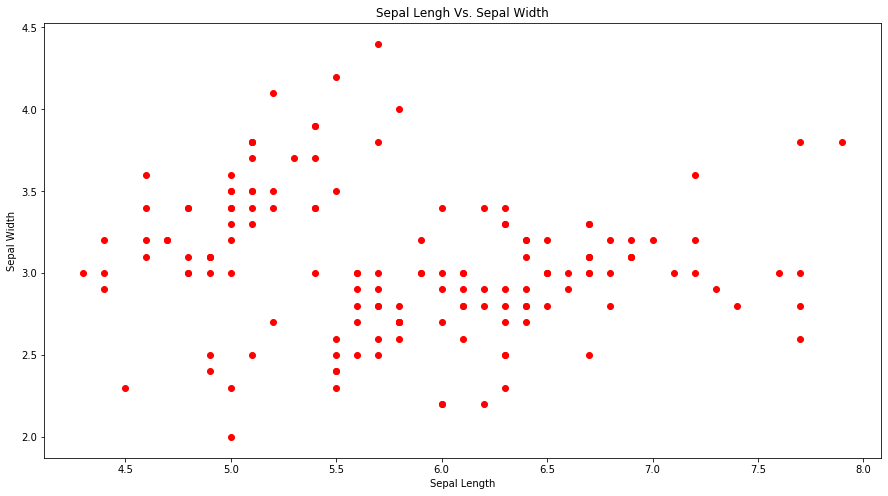

In [10]:
plt.figure(figsize=(15,8))
plt.scatter(x=df.SepalLengthCm, y=df.SepalWidthCm,c='r')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Lengh Vs. Sepal Width')

Text(0.5, 1.0, 'Petal Lengh Vs. Petal Width')

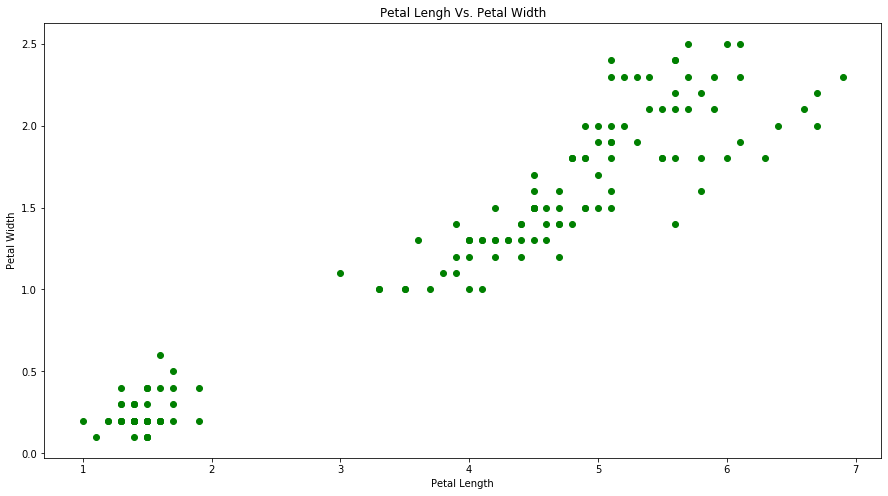

In [11]:
plt.figure(figsize=(15,8))
plt.scatter(x=df.PetalLengthCm, y=df.PetalWidthCm,c='g')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Lengh Vs. Petal Width')


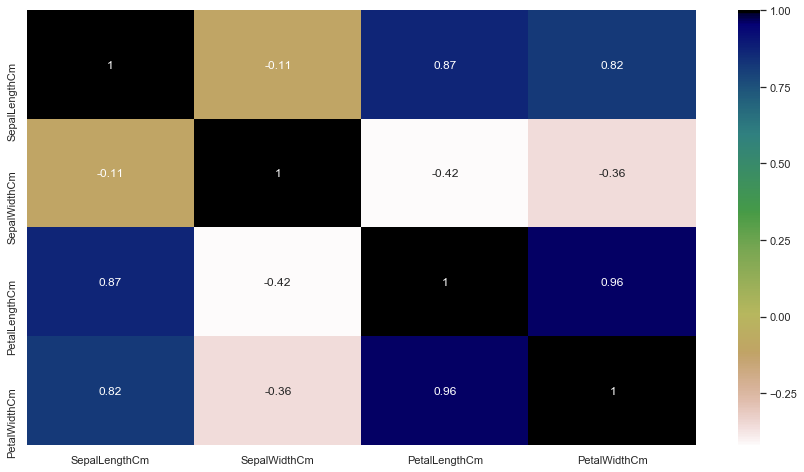

In [28]:
# Plotting the Heat map for correlation:
plt.figure(figsize=(15,8))
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='gist_earth_r', annot=True)
plt.show()

### Preparing the Data: 

In [12]:
x=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

In [13]:
y=df['Species'].values
X=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values

### Splitting the Data in Training and Testing: 

In [14]:
# importing the libraries for data splitting and Descion Tree:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [15]:
# Split Train and Test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

## Decision Tree Model:

In [16]:
# Training the Model:
tree_n=DecisionTreeClassifier()
tree_n.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
# Testing the Model:
target=tree_n.predict(X_test)

### Classification Report:

In [18]:
print(classification_report(y_test,target))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.86      1.00      0.92         6
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



### Confusion Matrix: 

In [19]:
print(confusion_matrix(y_test, target))

[[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]


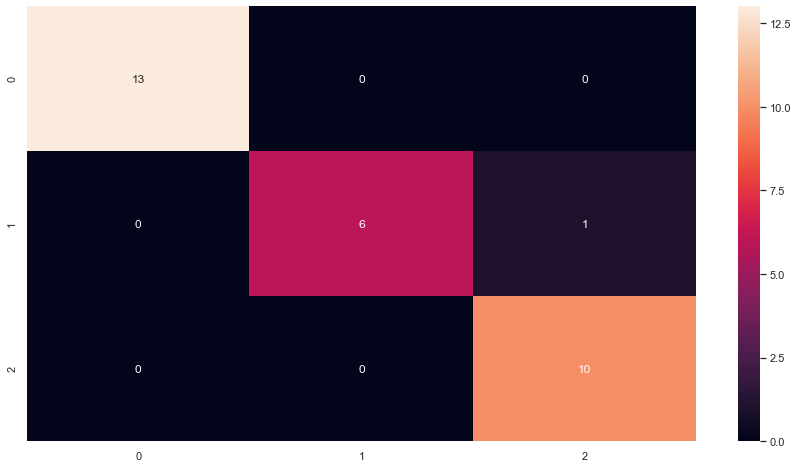

In [29]:
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(target, y_test),annot=True)
plt.show()

### Accuracy Score: 

In [20]:
print('Training Score:',accuracy_score(tree_n.predict(X_train),y_train))
print('Test Score:',accuracy_score(target,y_test))

Training Score: 1.0
Test Score: 0.9666666666666667


### Feature Importance: 

In [21]:
x=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

In [22]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
df_new=pd.DataFrame({'feature':x.columns, 'importance':tree_n.feature_importances_})
df_new.sort_values('importance',ascending=False)

,feature,importance
2,PetalLengthCm,0.549348
3,PetalWidthCm,0.413050
1,SepalWidthCm,0.037602
0,SepalLengthCm,0.000000


## Plotting the Decission Tree:

In [23]:
from sklearn import tree
import matplotlib.pyplot as plt

In [24]:
feature_cols=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

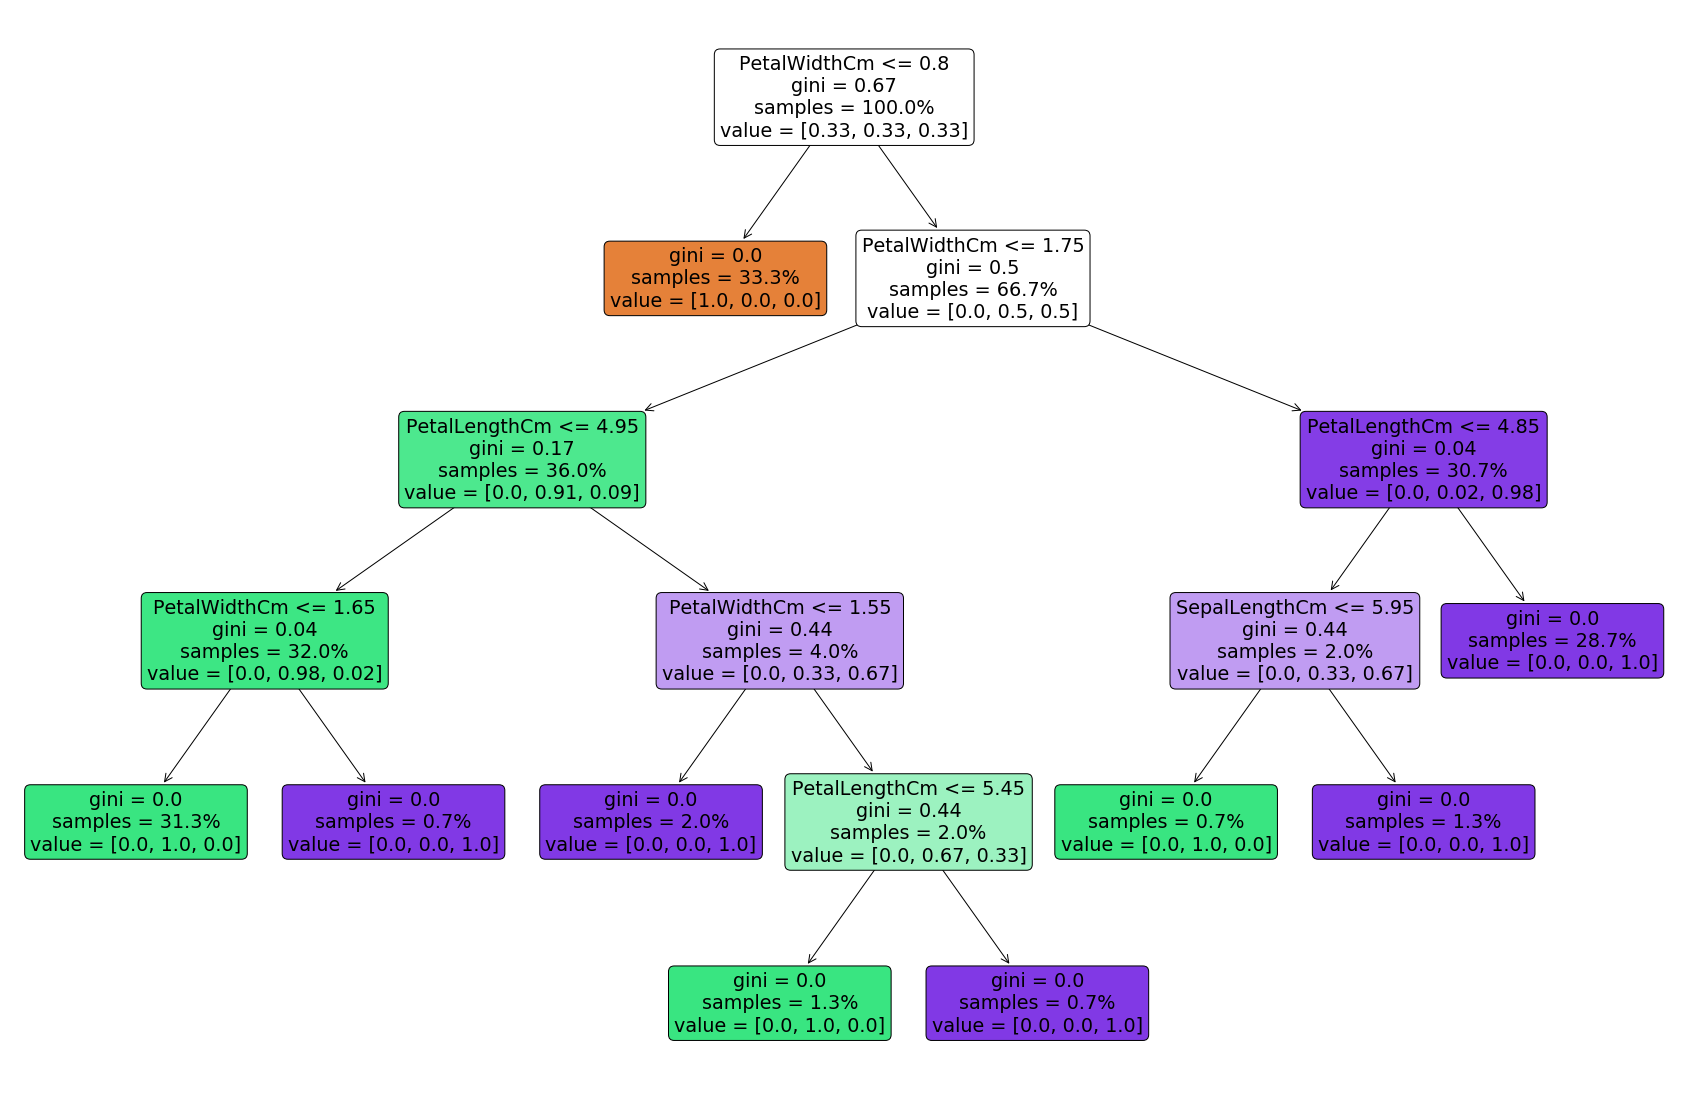

In [25]:
plt.figure(figsize=(30,20))
tree.plot_tree(tree_n.fit(X,y),feature_names=feature_cols,filled=True,precision=2,proportion=True,rounded=True)
plt.show()